## Business Understanding
- Output Target : a set includes (Predicted Datetime, Predicted Temperature)
- Performance metrics :Regression, MAE , RMSE , R2 ,...


## **STEP 2: Data Understanding**


This is how we get a quick look about dataset

The weather dataset contains 3,934 daily observations across 33 features (variables) recorded between 2015 and 2025.
 These include basic meteorological measurements (temperature, precipitation, wind, etc.), computed indices (feels-liketemperature, UV index, etc.), and metadata (location, timestamps, descriptive fields).
 | **Meteorological Measurements** | **Computed Indices** | **Metadata / Descriptive Fields** |
|:--|:--|:--|
| tempmax | feelslikemax | name |
| tempmin | feelslikemin | datetime |
| temp | feelslike | sunrise |
| dew | severerisk | sunset |
| humidity | moonphase | conditions |
| precip |  | description |
| precipprob |  | icon |
| precipcover |  | stations |
| preciptype |  |  |
| snow |  |  |
| snowdepth |  |  |
| windspeed |  |  |
| windgust |  |  |
| winddir |  |  |
| sealevelpressure |  |  |
| cloudcover |  |  |
| visibility |  |  |
| solarradiation |  |  |
| solarenergy |  |  |
| uvindex |  |  |


### **Location and Time**
* name: location coordinates (latitude,longtitude as string). For example for Ho Chi Minh city, it's "10.82,106.67". This is only for identifying the location, we will not be using this in forecasting models.
* datetime: date and time of the record in the 10-year span (from 2015 - 2025) for indexing observations. *Coding scheme*: date format YYY - MM - DD

### **Temperature Features**
- tempmax and tempmin: The highest and lowest temperature observed or forecasted that day (in °C). *Data range:* typically ~25-35°C, rarely above 36°C.
- temp: The mean (average) temperature of all readings that day (in °C). *Data range:* ~27-32°C

### **Feels-Like & Humidity Features**
* feelslikemax and feelslikemin: Maximum and minimum **apparent** temperature ("how hot it feels") of the day (in °C). *Data range*: For feelslike max, it's usually similar to or slightly above tempmax (30–38 °C) & ~25-28°C for feelslike min.
* feelslike: Mean **apparent** temperature (in °C). *Data range*: ~27-34°C
* dew (Dew Point): Temperature at which air becomes saturated and moisture condenses. High dew poins means muggy weather (in °C). *Data range*: Dew points are pretty high at ~20 - 26°C.
* humidity (Relative humidity): Percentage of water vaport relative to the maximum possible at that temperature (measured in %). *Data range*: 0 - 100%; HCMC is often humid(~50-100%) year round.



### **Precipitation and Snow Features**
Precipitation is the sum of the amount of liquid equivalent rainfall, snow or other precipitation that fell is predicted to fall in the period.
- precip: The amount of precipitation that fell or is predicted to fall in the specified time period. The values are indicated in inches or mm. *Data range*: 0 to very large (100+ mm) in heavy storms. In HCMC, many days have 0 (dry) or modest rainfall (<10 mm), but monsoon storms can bring tens of mm. 
- precipprob: Chance (%) of precipitation occurence. *Data range*: 0 - 100%.
- precipcover: Percent of time interval with measurable precipitation. For example, if within a 24 hour day there are six hours of measurable rainfall, the precipitation coverage is 25% (6/24*100). *Data range*: 0 - 100% 
- preciptype: Type(s) of precipation(e.g. "rain"). *Data type*: categorical string. In HCMC, typically "rain"; no snow.
- For snow features, snow represents the amount of new snow fall (in mm) & snowdepth shows the average snow depth on ground (in cm or mm). *Data range*: 0 in HCMC.

### **Wind features**
- windspeed: Average wind speed over the day (in km/h or m/s). *Data range:* typically 0–50 km/h (0–14 m/s) for daily values; HCMC often has light breeze (~0–20 km/h)
- windgust: the maximum short-term wind speed (in km/h). *Data range:* usually exceeds windspeed by ~10+ km/h, may see gusts ~30–60 km/h in storms.
- winddir (Wind Direction): Direction from which the wind blows (in degrees where 0°=North, 90°=East). *Data range*: 0 - 360°

### **Pressure**
- sealevelpressure: The atmospheric pressure at a location that removes reduction in pressure due to the altitude of the location (in hPa/milibars).
*Data range*: in HCMC usually ~1005–1015 hPa

### **Cloud and visibility**
- cloudcover: The fraction of sky covered by clouds (in %). *Data range:* 0–100%
- visibility: The distance that can be seen in daylight (in km or miles). *Data range*: from 0 (fog) to ~20+ km (clear air); in HCMC typically ~5–10 km

### **Solar radiation and UV**
- solarradiation: The sonar power flux (in W/m^2) at the instantaneous moment of the observation. *Data range*: from 0 (night/cloudy) to ~1000 W/m² (noon clear sky)
- solarenergy: The total energy from the sun that builds up over a time period (in MJ/m^2).
*Data range*: 0 (night) to ~20–25 MJ/m² per sunny day (roughly the integral of solarradiation)
- uvindex: Level of ultra violet (UV) radiation exposure from 0 - 10 scale; with 0 = no exposure and 10 = extreme exposure. *Data range*: 0–11 (top of scale).

### **Other Weather Indicators**
- severerisk: Model's severe weather risk indicator for extreme weather measured in scaled measure often from 0 to 100. *Data type*: numeric or categorical.
- sunrise/sunset: The time of the sunrise and sunset in the day. *Data type:* datetime; format YYY-MM-DD
- moonphase: A decimal value representing the current moon phase between 0 and 1 where 0 = new moon, 0.5 = full moon. The full cycle can be represented as:
0 – new moon\
0-0.25 – waxing crescent\
0.25 – first quarter\
0.25-0.5 – waxing gibbous\
0.5 – full moon\
0.5-0.75 – waning gibbous\
0.75 – last quarter\
0.75 -1 – waning crescent.

### **Descriptive Fields**
- conditions: Short text of weather (e.g "Rain", "Clear"). *Data type*: string. 
*Typical values(observed in dataset)*: "Rain","Partially cloudy","Clear","Overcast","Mostly cloudy","Fog".
- description: Long text summary of weather that day for reports. *Data type*: string; 
*Typical exemples*: "Partly cloudy throughout the day","Rain in the afternoon and evening", "Clear conditions throughout the day". 
- stations: List of weather station names, their ID within the Visual Crossing weather data platform and the distance from the requested location to the weather station. *Data type*: string list,
*Typical values*: "VVTS", "VVDN", "VVVH" — representing Ho Chi Minh and nearby stations.
- icon: Coded text value to indicate which icon to show when displaying the weather data (use UI display). *Data type*: string. *Typical values*: "rain", "partly-cloudy-day", "clear-day", "cloudy", "fog", "thunderstorm". 

##### **The unique values of each descriptive fields:**

=== CONDITIONS ===
- Partially cloudy
- Rain, Partially cloudy
- Clear
- Rain, Overcast

=== DESCRIPTION ===
- Partly cloudy throughout the day.
- Partly cloudy throughout the day with rain in the morning and afternoon.
- Partly cloudy throughout the day with morning rain.
- Partly cloudy throughout the day with late afternoon rain.
- Clearing in the afternoon.
- Becoming cloudy in the afternoon.
- Clear conditions throughout the day.
- Partly cloudy throughout the day with rain.
- Partly cloudy throughout the day with afternoon rain.
- Partly cloudy throughout the day with early morning rain.
- Partly cloudy throughout the day with a chance of rain throughout the day.
- Partly cloudy throughout the day with rain clearing later.
- Becoming cloudy in the afternoon with rain.
- Cloudy skies throughout the day with early morning rain.
- Cloudy skies throughout the day with rain.
- Becoming cloudy in the afternoon with rain in the morning and afternoon.
- Becoming cloudy in the afternoon with afternoon rain.
- Cloudy skies throughout the day with a chance of rain throughout the day.
- Cloudy skies throughout the day with afternoon rain.
- Clearing in the afternoon with afternoon rain.

=== STATIONS ===
- 48894099999,48900099999,VVTS
- 48894099999,48900099999,VVTS,remote
- 48894099999,remote
- 48894099999,48900099999,remote
- 48900099999,VVTS
- 48900099999,VVTS,remote
- 48894099999,48900099999
- VVTS
- 48894099999,VVTS
- 48894099999,VVTS,remote
- VVTS,remote

=== ICON ===
- partly-cloudy-day
- rain
- clear-day


In [1]:
!pip install seaborn --quiet


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Checking daily temp in ten years

In [3]:
!pip install openpyxl --quiet


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
df = pd.read_excel("HCMWeatherDaily.xlsx")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.sort_values("datetime")

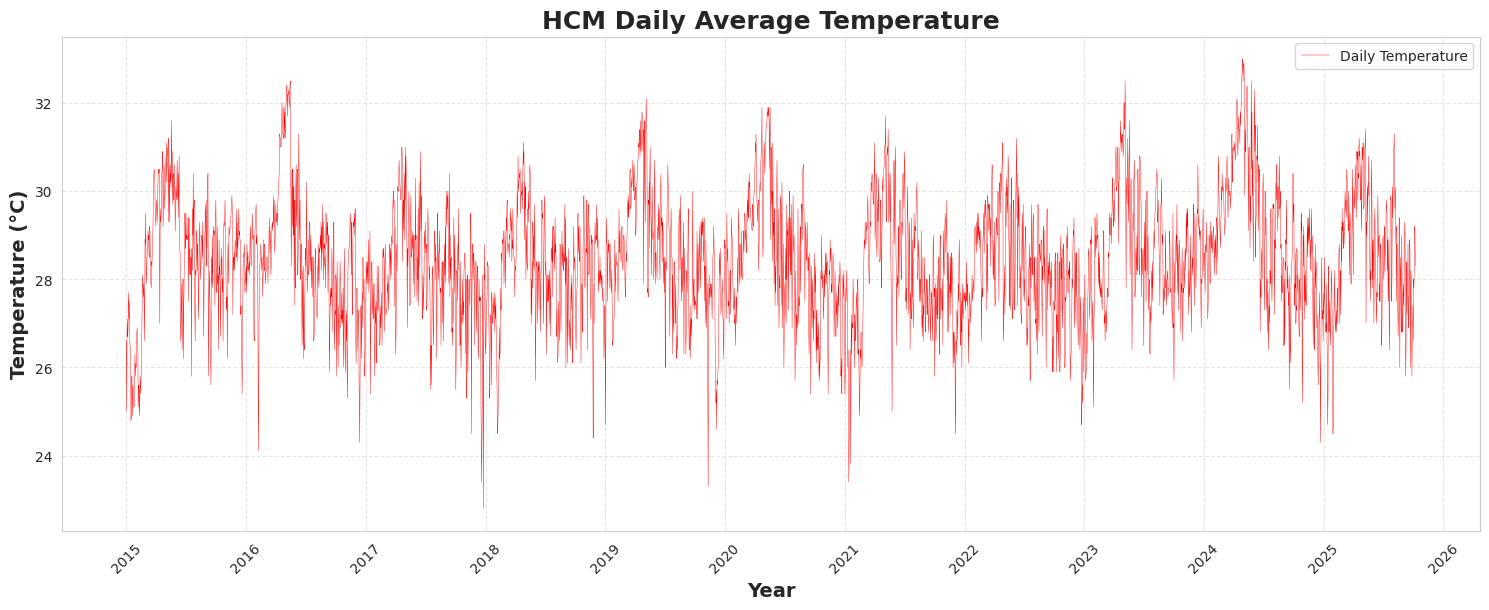

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df["datetime"], df["temp"], color="red", linewidth=0.3, alpha=1, label="Daily Temperature")
plt.title("HCM Daily Average Temperature", fontsize = 18, fontweight='bold')
plt.xlabel("Year", fontsize = 14, fontweight='bold')
plt.ylabel("Temperature (°C)", fontsize = 14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=45)
plt.show()

## Checking annual temp in ten years

/toolkit-cache/1.1.4/python3.11/kernel-libs/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


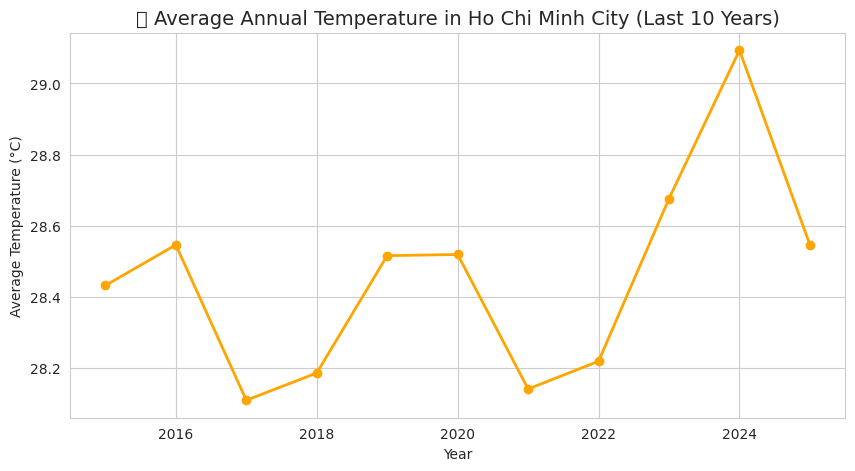

In [6]:
df['year'] = df['datetime'].dt.year

# Tính trung bình nhiệt độ theo năm
yearly_avg = df.groupby('year')['temp'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='orange', linewidth=2)

plt.title("📈 Average Annual Temperature in Ho Chi Minh City (Last 10 Years)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

## Checking avg month temp in each year

/toolkit-cache/1.1.4/python3.11/kernel-libs/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


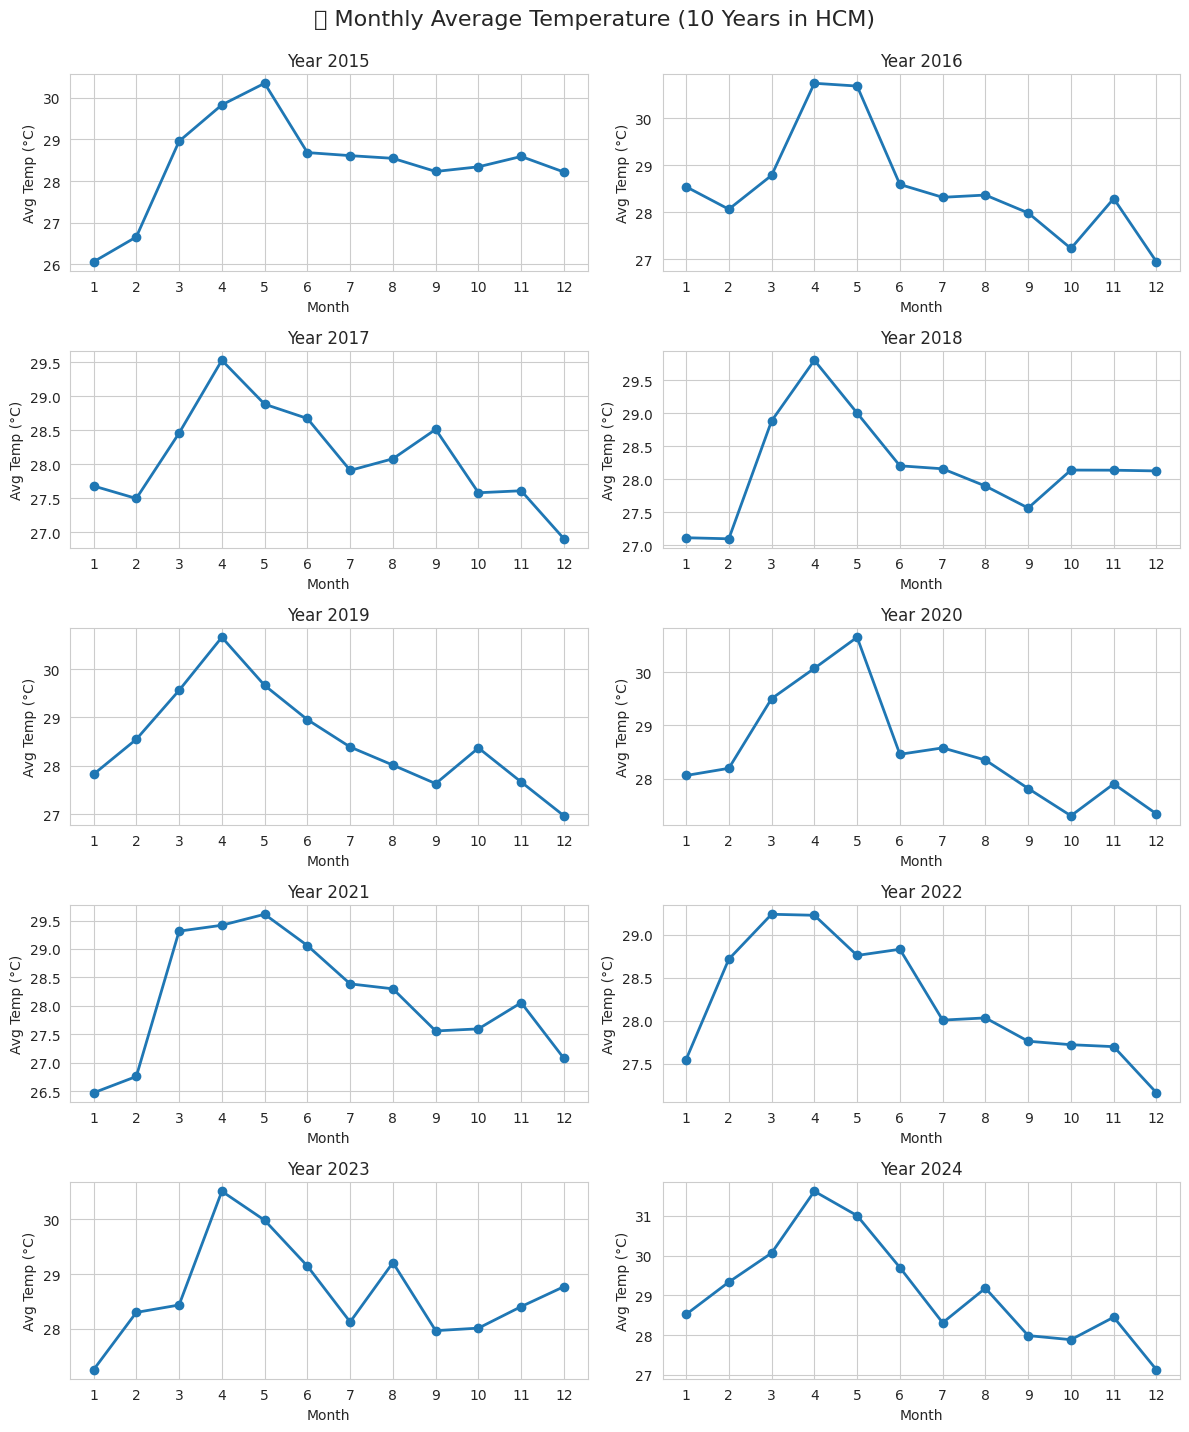

In [7]:
# Tính trung bình nhiệt độ theo tháng của từng năm
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
monthly_avg = df.groupby(['year', 'month'])['temp'].mean().reset_index()

# Lấy danh sách năm (10 năm)
years = sorted(monthly_avg['year'].unique())[:10]  # lấy 10 năm đầu tiên

# Tạo figure nhiều subplot
fig, axes = plt.subplots(5, 2, figsize=(12, 14))  # 10 biểu đồ (5 hàng x 2 cột)
axes = axes.flatten()

# Vẽ từng biểu đồ cho mỗi năm
for i, year in enumerate(years):
    data_year = monthly_avg[monthly_avg['year'] == year]
    axes[i].plot(data_year['month'], data_year['temp'], marker='o', linewidth=2)
    axes[i].set_title(f"Year {year}")
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Avg Temp (°C)")
    axes[i].grid(True)
    axes[i].set_xticks(range(1, 13))

# Xóa biểu đồ thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Căn chỉnh và hiển thị
plt.tight_layout()
plt.suptitle("🌡️ Monthly Average Temperature (10 Years in HCM)", fontsize=16, y=1.02)
plt.show()

## Checking the days with highest temp and lowest temp in 10 years

In [8]:
max_temp_row = df.loc[df['temp'].idxmax()]

# Lấy ngày có nhiệt độ thấp nhất
min_temp_row = df.loc[df['temp'].idxmin()]

# In kết quả
print(" The day with the highest temperature:")
print(max_temp_row[['datetime', 'temp']])

print("\n The day with the lowest temperature:")
print(min_temp_row[['datetime', 'temp']])

 The day with the highest temperature:
datetime    2024-04-28 00:00:00
temp                       33.0
Name: 3405, dtype: object

 The day with the lowest temperature:
datetime    2017-12-25 00:00:00
temp                       22.8
Name: 1089, dtype: object


# **OBSERVATION**
Average yearly temperature is around 28°C, with highs around 30°C and lows around 25°C. HCM  City also was witnessed that in  last 10 years , there were no severe weather phenominon like typhoon or drought since the average temperature difference between each year is slightly small , around 1 Celcius. 
## **After obsevering the temperature data , we also give you some minor information about a seasonal cycle in HCM city and the trend of temperature in last a decade:**
### **Seasonal cycle in HCM city**
- Hot season is from November to May, which has the highest temperature and UV exposure.It is easy to figure this feature on the table since the temp line is increasing from the Q4 of year and reach the peak in the middle of year before decreasing again. This plot is typical in the region like HCM city ,line go up at the left of table , go down at the right of table
- Rainy season is from May to October, which has the lower temperature , high humidity , and heavy rainfall
### **Trend of temperature in last a decade**
- The temp line was not stable , it fluctuated quite clearly.
- There are some years observed that the temp was quite stable such as period from 2019 - 2020 , the tempmax and tempmin diff between days of this period  was  smaller than other years . It means that HCM city had a cooler weather condition in these years.
- In 2024, we got a peak of temparature in a day : approx 33 Celcius, which was the highest in the last decade. The plot also tell us that from the ending of 2020 to 2024, the avg temp line in dry season had the shape like diagonal  . This means that the climate change is getting worse and worse. Maybe HCM city will face with severe weather condition like scorching heatwave often in the future.

  
  
  




# **DEEPER RESEARCH**

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'tempmax'}>,
        <Axes: title={'center': 'tempmin'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'feelslikemax'}>],
       [<Axes: title={'center': 'feelslikemin'}>,
        <Axes: title={'center': 'feelslike'}>,
        <Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'precip'}>],
       [<Axes: title={'center': 'precipprob'}>,
        <Axes: title={'center': 'precipcover'}>,
        <Axes: title={'center': 'snow'}>,
        <Axes: title={'center': 'snowdepth'}>,
        <Axes: title={'center': 'windgust'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'winddir'}>,
        <Axes: title={'center': 'sealevelpressure'}>,
        <Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'solarradiation'}>,
        <Axes:

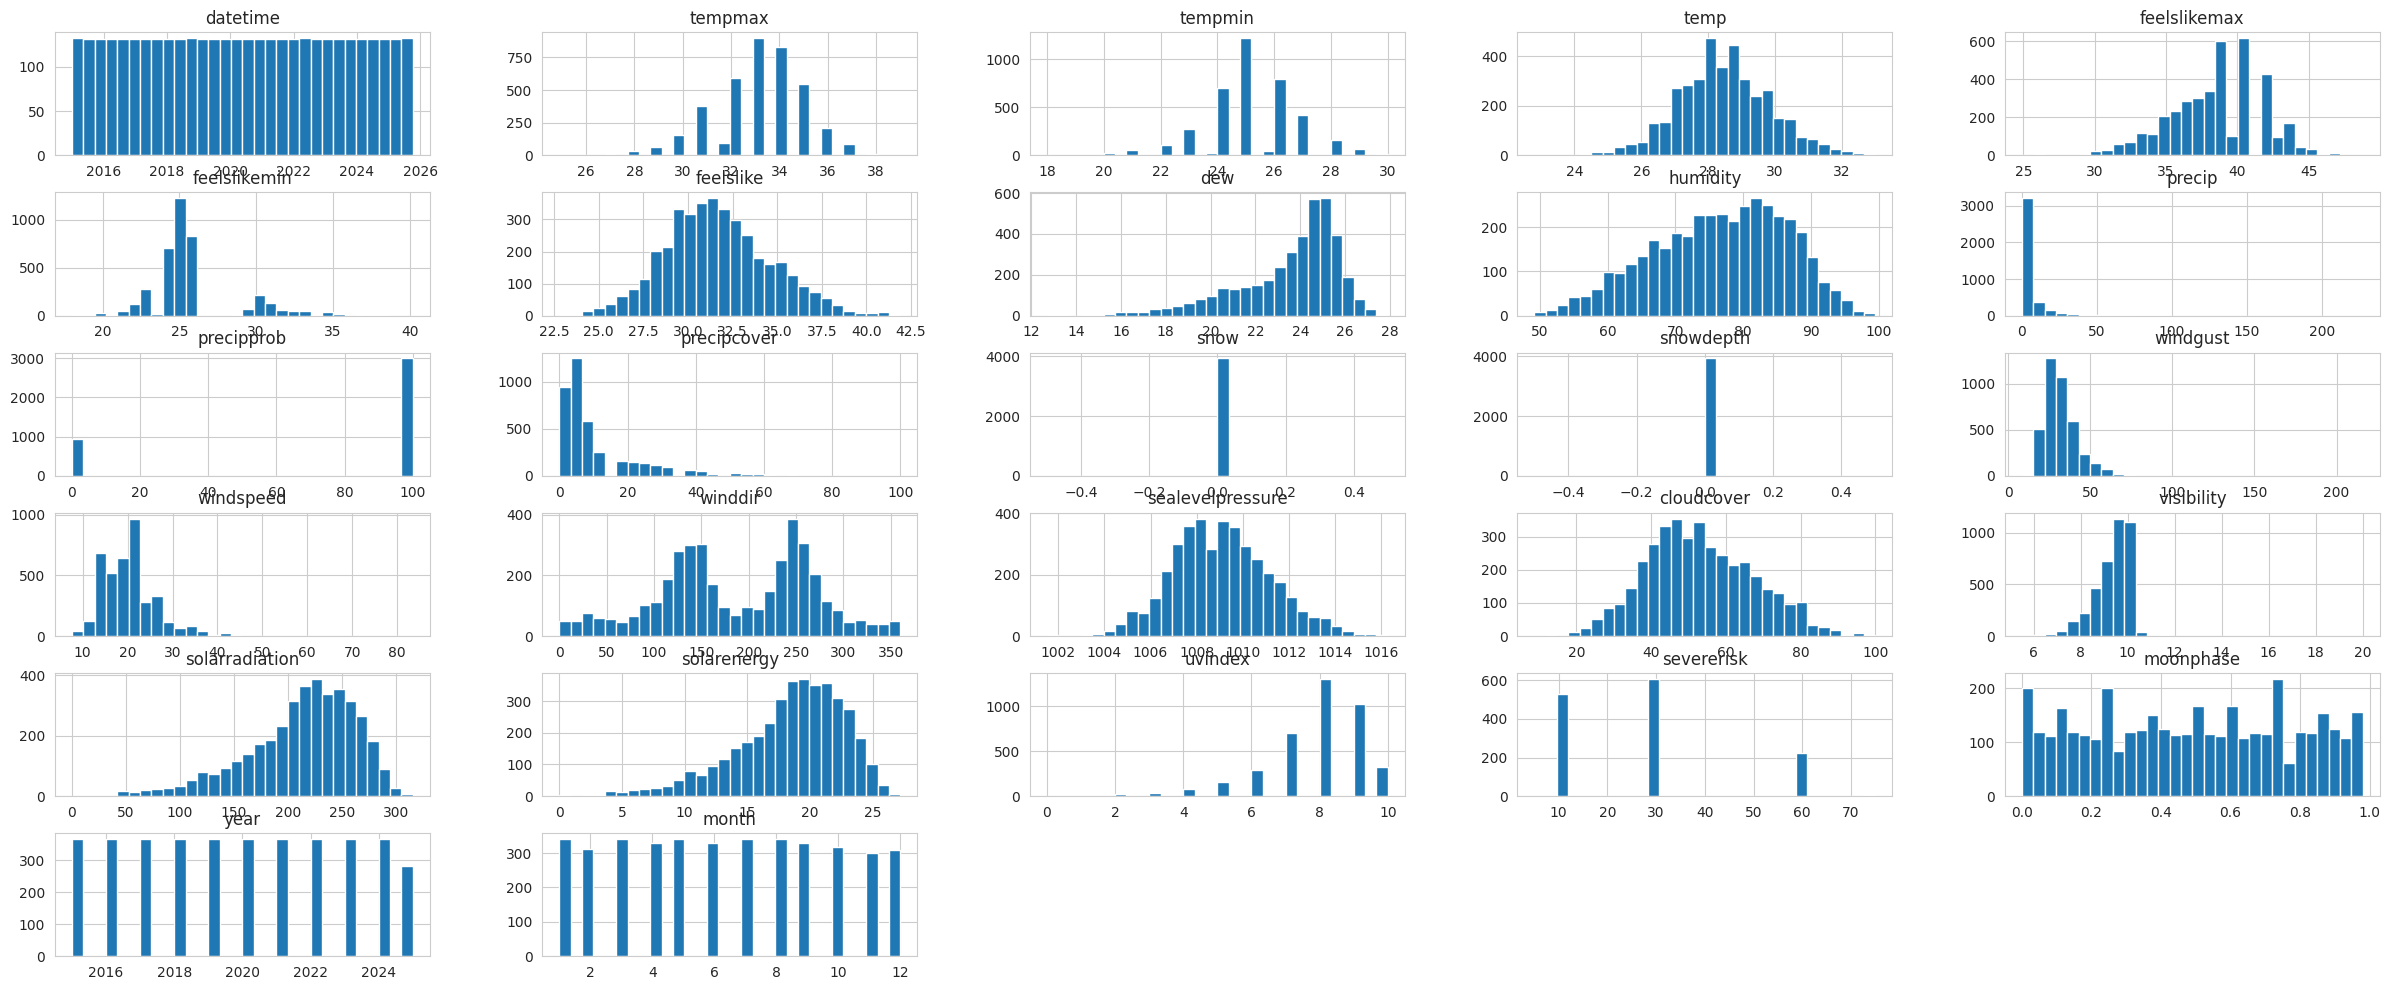

In [9]:
df.hist(bins=30, figsize=(30,12))


## Feature Distribution Analysis

The dataset shows that most weather-related features follow either a normal distribution or a right-skewed distribution, which aligns with the natural behavior of meteorological phenomena.

**1. Temperature Variables (tempmax, tempmin, temp, feelslike, feelslikemax, feelslikemin)**
All temperature-related features exhibit near-normal distributions centered around moderate values. tempmax and feelslikemax show a slight right skew, while tempmin and feelslikemin lean slightly left. This indicates that daily temperature ranges are relatively stable with minor fluctuations.

**2. Dew Point (dew)**
The dew point follows an approximately normal distribution, suggesting consistent humidity behavior around a central value.

**3. Humidity**
Humidity is mostly high (60–90%) and slightly left-skewed, meaning low-humidity days are uncommon.

**4. Precipitation (precip) and Precipitation Probability (precipprob)**
Both variables are highly right-skewed, with most values close to zero. This reflects that rainfall is infrequent and intense rainfall events occur only occasionally.

**5. Wind Direction (winddir)**
The distribution is multi-modal, indicating that wind can come from several dominant directions rather than being concentrated in a single direction.

**6. windspeed & windgust**
windspeed shows a near-normal distribution centered around 10–20 km/h.
windgust is strongly right-skewed, meaning strong gusts occur infrequently.

**7. pressure and sealevelpressure**
Both variables form a tight normal distribution around 1010–1014 hPa, showing that atmospheric pressure is relatively stable throughout the dataset.

**8. cloudcover**
cloudcover follows an almost normal distribution between 30–70%, suggesting that fully clear or fully overcast days are less common.

**9. visibility**
visibility is strongly right-skewed, where most days have high visibility (10–15 km). Low-visibility events are rare and likely caused by fog or heavy rain.

**10. solarradiation & solarenergy**
Both features show a mild right skew, indicating that average daily solar radiation is moderate, with only a few days reaching extreme levels.

**11. snow & snowdepth**
Most values are zero, meaning snowfall does not occur in this region. These variables offer limited predictive value for modeling.

**12. severerisk**
The distribution is discrete with occasional high peaks, showing that severe weather risks appear only on isolated days.

**13. moonphase**
The distribution is nearly uniform, reflecting the cyclical and evenly distributed nature of lunar phases.

**14. month & year**
The month feature covers all 12 months evenly, indicating full seasonal coverage.
The year feature is evenly distributed, confirming that the dataset spans multiple continuous years without gaps.



### Boxplot for checking Outliers

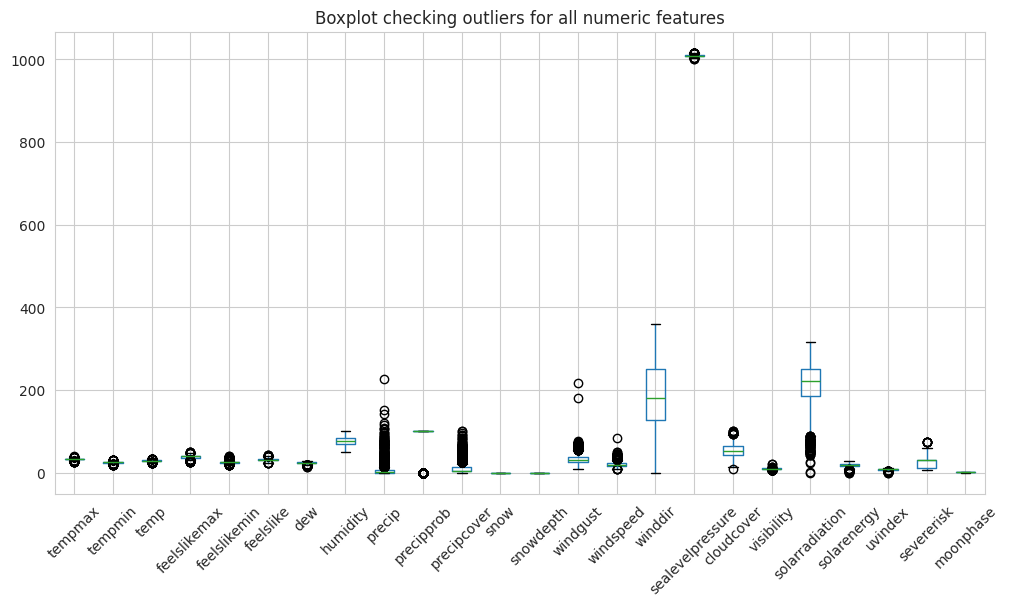

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df là DataFrame của bạn
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot checking outliers for all numeric features")
plt.show()


### Checking number of outliers

In [43]:
import numpy as np

outlier_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_dict[col] = outliers

# Hiển thị kết quả
for col, outliers in outlier_dict.items():
    print(f"{col} -> số outliers: {len(outliers)}")


tempmax -> số outliers: 69
tempmin -> số outliers: 55
temp -> số outliers: 52
feelslikemax -> số outliers: 41
feelslikemin -> số outliers: 697
feelslike -> số outliers: 34
dew -> số outliers: 144
humidity -> số outliers: 0
precip -> số outliers: 436
precipprob -> số outliers: 943
precipcover -> số outliers: 590
snow -> số outliers: 0
snowdepth -> số outliers: 0
windgust -> số outliers: 135
windspeed -> số outliers: 233
winddir -> số outliers: 0
sealevelpressure -> số outliers: 31
cloudcover -> số outliers: 14
visibility -> số outliers: 74
solarradiation -> số outliers: 85
solarenergy -> số outliers: 84
uvindex -> số outliers: 68
severerisk -> số outliers: 7
moonphase -> số outliers: 0


## Checking relationship between some numeric features and temperature using ScatterPlot

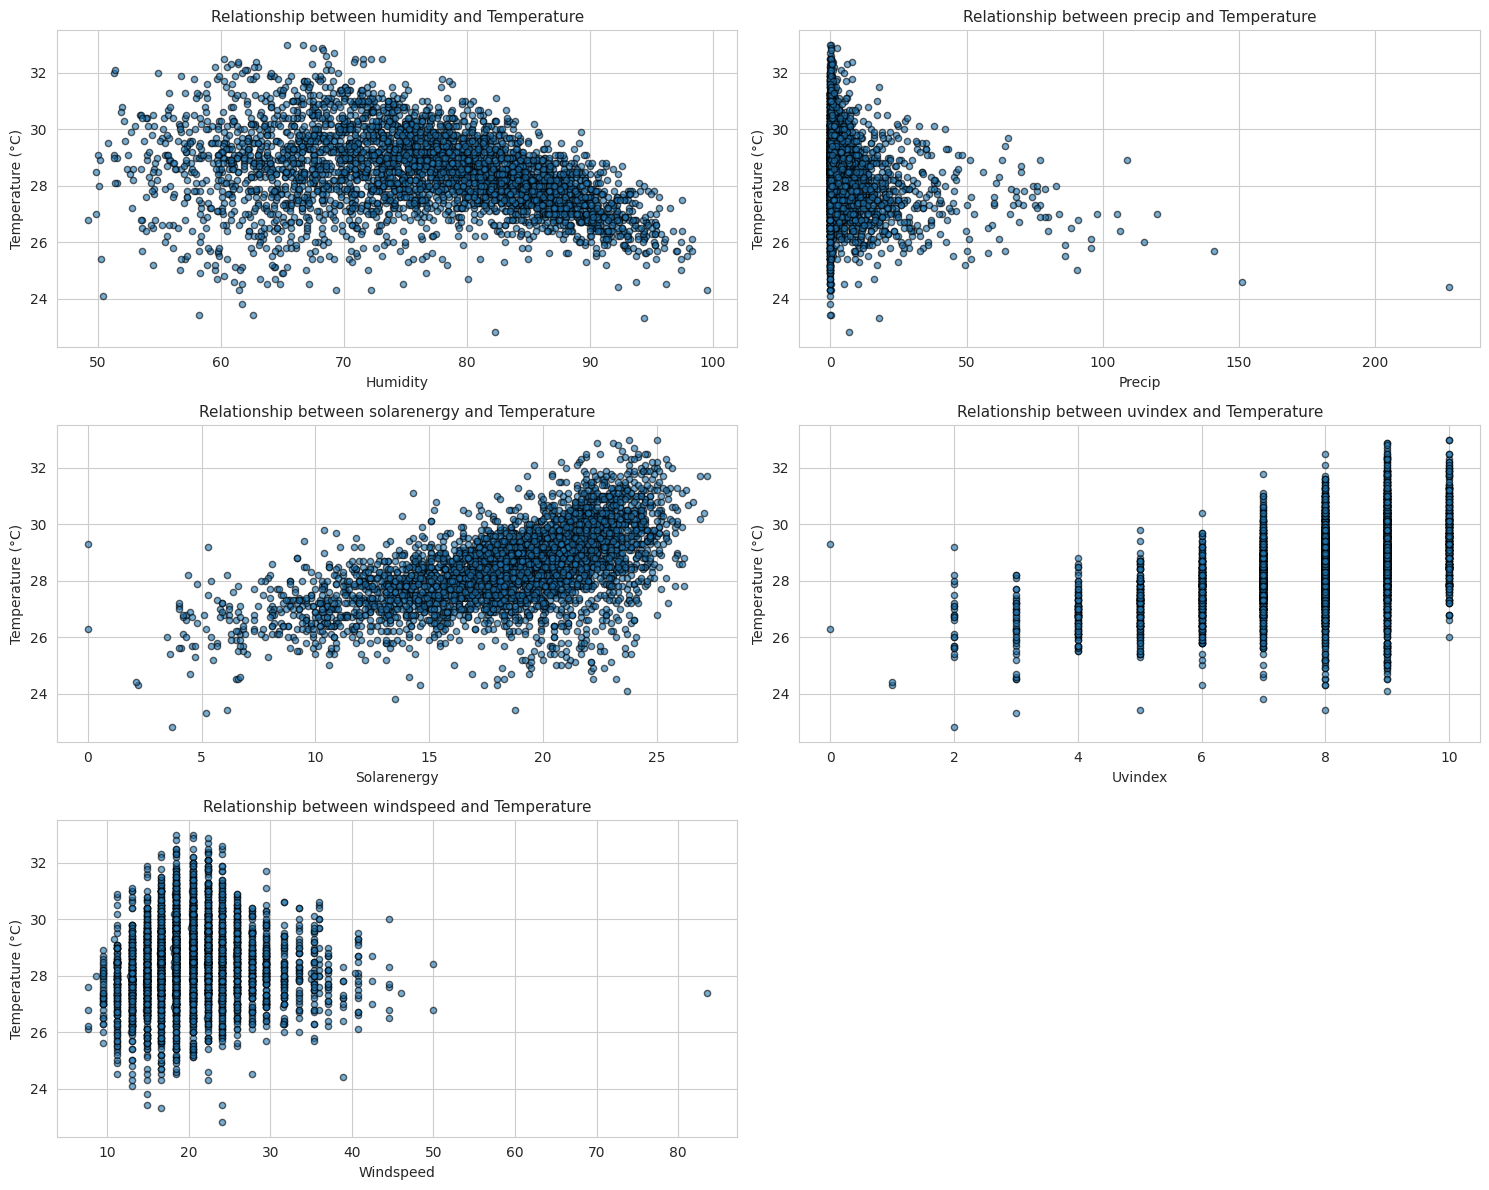

In [31]:
features = [ 'humidity', 'precip', 'solarenergy', 'uvindex', 'windspeed']

# Tạo 6 biểu đồ riêng biệt
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)  # 3 hàng, 2 cột
    plt.scatter(df[feature], df['temp'], alpha=0.6, s=20, edgecolors='k')
    plt.title(f"Relationship between {feature} and Temperature", fontsize=11)
    plt.xlabel(feature.capitalize())
    plt.ylabel("Temperature (°C)")
    plt.grid(True)

plt.tight_layout()
plt.show()

## Analysis of Feature Relationships with the Target Variable: Average Temperature ($temp$)

The analysis of the relationship between weather features and the target variable, **Average Temperature ($temp$)**, is a foundational step for any predictive modeling effort. Given the physical nature of weather data, we anticipate strong and logically coherent relationships.


### 1. Strong Linear (Positive) Relationships

Several features exhibit an **extremely strong positive correlation** with $temp$ as they represent various facets of temperature itself:
Since some featues have the 'temp' in the dataset,which often causes the leakage , so we need to be careful with these features like tempmax , tempmin ,...
Feelslikemax, feelslikemin is strong positive correlation with $temp$ as they represent various facets of temperature itself


### 2. Notable and Complex Correlations

These variables have a significant but sometimes more complex relationship with $temp$:
* **Humidity ($humidity$):** The relationship between humidity and temperature is often **slightly negative** or **complex**. Very high average temperatures can sometimes be associated with drier air (lower humidity), but the correlation is not always straightforward as humidity is also linked to precipitation.
* **Solar Radiation ($solarradiation$, $solarenergy$) and UV Index ($uvindex$):** These features show a **strong positive correlation** with $temp$. Greater solar intensity leads directly to higher air temperatures.
* **Cloud Cover ($cloudcover$):** This typically exhibits a **negative correlation** with $temp$. Extensive cloud coverage blocks incoming solar radiation during the day, resulting in a lower maximum temperature and thus a lower average temperature.


### 3. Weak Relationships

* **Precipitation ($precip$) and Wind Speed/Direction ($windspeed$, $winddir$):** These features typically show a **weak linear correlation** with the average daily temperature. While heavy rain can cause a short-term temperature drop, the overall impact on the daily average is often less significant than other factors.

**In summary**, for effective predictive modeling of $temp$, priority should be given to features with **strong linear ties** ($tempmax$, $tempmin$). These should then be complemented by variables with notable influence, such as **humidity** and **solar radiation**, to build a robust temperature forecasting model.

## **We nominate some numeric features which are typical samples for predicting the temperature in HCM city. They include**
- humidity
- precip
- solarenergy
- uvindex
- windspeed


## Correlation Matrix

In [12]:
# Select relevant numerical columns for correlation analysis
features = ['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed', 'solarenergy', 'uvindex']
corr_matrix = df[features].corr()
corr_matrix

,temp,tempmax,tempmin,humidity,precip,windspeed,solarenergy,uvindex
temp,1.000000,0.841516,0.783958,-0.342259,-0.222926,0.055540,0.580570,0.473779
tempmax,0.841516,1.000000,0.487234,-0.489181,-0.246152,0.029428,0.714764,0.622385
tempmin,0.783958,0.487234,1.000000,0.043307,-0.054350,0.163662,0.223248,0.163538
humidity,-0.342259,-0.489181,0.043307,1.000000,0.369561,0.202432,-0.565355,-0.522943
precip,-0.222926,-0.246152,-0.054350,0.369561,1.000000,0.112755,-0.310921,-0.283976
windspeed,0.055540,0.029428,0.163662,0.202432,0.112755,1.000000,-0.072358,-0.047855
solarenergy,0.580570,0.714764,0.223248,-0.565355,-0.310921,-0.072358,1.000000,0.910886
uvindex,0.473779,0.622385,0.163538,-0.522943,-0.283976,-0.047855,0.910886,1.000000


## Key relationships affecting temperature

Temperature ↔ Maximum temperature (r = 0.84)
 Strong positive correlation — higher daily maximums raise the overall average temperature.

Temperature ↔ Solar energy (r = 0.58)
 More sunlight means warmer days — solar radiation is one of the strongest natural drivers of temperature.

Temperature ↔ UV index (r = 0.47)
 High UV exposure often occurs with clearer skies and stronger solar radiation, both contributing to higher temperatures.

Temperature ↔ Humidity (r = -0.34)
 Inverse relationship — humid, cloudy days tend to reduce the average temperature because moisture absorbs heat and reduces solar radiation.

Temperature ↔ Precipitation (r = -0.22)
 More rain usually cools down the environment, reducing temperature averages slightly.

## Secondary relationships

Solar energy ↔ UV index (r = 0.91)
These two are almost perfectly correlated — clear, sunny days with high solar energy naturally have stronger UV radiation.

Humidity ↔ Solar energy (r = -0.57)
When humidity increases (rainy season), solar radiation decreases due to thicker cloud cover.

## Interpretation:

During the last decade in Ho Chi Minh City:

Higher temperature years coincide with more sunshine and higher UV levels (dry seasons).

Cooler, more humid years occur during heavier monsoon seasons, when clouds block sunlight and increase rainfall.

Wind speed shows little correlation (r ≈ 0.05), meaning it doesn’t significantly influence temperature patterns here.

## **In terms of categorial features, we have**
- conditions
- description
- icon
- stations


To show the relationship between the label (temp) and categorical features, we calculate the mean of temp for each category values of each feature. The final results help us to understand the impact of each category on the temperature.

In [14]:
import pandas as pd
# Ensure 'temp' exists as label
if 'temp' not in df.columns:
    raise ValueError("Column 'temp' not found in dataset.")

# Select categorical columns that are weather related
categorical_cols = ['conditions']  # description has too many unique values
te_results = {}
for col in categorical_cols:
    te_results[col] = df.groupby(col)['temp'].agg(['mean', 'count']).sort_values(by='count', ascending=False)

te_results


{'conditions':                              mean  count
 conditions                              
 Rain, Partially cloudy  28.488807   2975
 Partially cloudy        28.388639    933
 Rain, Overcast          25.875000     16
 Clear                   27.400000     10}

| Weather Condition      | Mean Temp (°C) | Count (days) | Relationship                                                                                     |
| ---------------------- | -------------- | ------------ | ------------------------------------------------------------------------------------------ |
| Rain, Partially cloudy | **28.49**      | 2,975        | High and most common temperature → typical weather in Ho Chi Minh City                     |
| Partially cloudy       | **28.39**      | 933          | Very close to the above → little rain but still hot                                        |
| Rain, Overcast         | 25.88          | 16           | Temperature drops significantly due to thick cloud cover blocking sunlight                 |
| Clear                  | 27.40          | 10           | Less cloud → hotter than Overcast but lower than Partially cloudy due to small sample size |


In [15]:
import pandas as pd
# Ensure 'temp' exists
if 'temp' not in df.columns:
    raise ValueError("Label column 'temp' not found in dataset.")
# Process DESCRIPTION column -> target encode -> show TOP 15 categories by count
desc_te = (
    df.groupby('description')['temp']
    .agg(['mean', 'count'])
    .sort_values(by='count', ascending=False)
)

# Select only top 15 most frequent categories
top_desc_te = desc_te.head(15)
top_desc_te


,mean,count
description,,
Partly cloudy throughout the day.,28.412896,853
Partly cloudy throughout the day with rain.,28.250119,840
Partly cloudy throughout the day with late afternoon rain.,28.291011,623
Partly cloudy throughout the day with afternoon rain.,28.806417,374
Partly cloudy throughout the day with a chance of rain throughout the day.,28.401130,354
Partly cloudy throughout the day with rain in the morning and afternoon.,29.124709,344
Partly cloudy throughout the day with early morning rain.,28.218018,222
Partly cloudy throughout the day with morning rain.,28.998519,135
Becoming cloudy in the afternoon.,28.216393,61


| Description                                                | Mean Temp (°C) | Count | Relationship                                                               |
| ---------------------------------------------------------- | -------------- | ----- | ----------------------------------------------------------------------- |
| Partly cloudy throughout the day.                          | **28.41**      | 853   | Quite hot → typical weather in Ho Chi Minh City                         |
| Partly cloudy throughout the day with rain.                | **28.25**      | 840   | Rain does not significantly reduce the temperature                      |
| Partly cloudy throughout the day with late afternoon rain. | 28.29          | 623   | Very similar to the condition above                                     |
| Partly cloudy… + afternoon rain                            | **28.81**      | 374   | Rain comes late → more daytime sunlight causing higher heat             |
| Partly cloudy… chance of rain                              | 28.40          | 354   | Just a chance of rain → still hot                                       |
| Partly cloudy… rain in the evening                         | **29.12**      | 344   | Hottest among these → evening rain does not cool down the day           |
| Becoming cloudy in the afternoon                           | 28.22          | 61    | Clouds appear late so the temperature remains high                      |
| Partly cloudy… rain clearing overnight                     | **29.20**      | 29    | Very hot but the sample size is small                                   |
| Clear conditions throughout the day                        | 27.40          | 10    | Clear sky but surprisingly cooler → small sample size, not reliable yet |


## CHI-Squared to show the relationship between the categorical features

In [16]:
!pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [22]:
import pandas as pd
from scipy.stats import chi2_contingency
categorical_cols = df.select_dtypes(include=["object"]).columns.drop(['name','preciptype'])
def run_chi_square(df, cat1, cat2):
    contingency = pd.crosstab(df[cat1], df[cat2])
    chi2, p, dof, expected = chi2_contingency(contingency)
    return {
        "cat1": cat1,
        "cat2": cat2,
        "chi2": chi2,
        "p_value": p,
        "dof": dof
    }
chi_results = []

for i, c1 in enumerate(categorical_cols):
    for c2 in categorical_cols[i+1:]:
        r = run_chi_square(df, c1, c2)
        chi_results.append(r)

pd.DataFrame(chi_results)


,cat1,cat2,chi2,p_value,dof
0,sunrise,sunset,1.547242e+07,2.397314e-01,15468489
1,sunrise,conditions,1.180200e+04,4.904792e-01,11799
2,sunrise,description,1.062180e+05,4.760662e-01,106191
3,sunrise,icon,7.868000e+03,4.915194e-01,7866
4,sunrise,stations,3.934000e+04,4.848322e-01,39330
5,sunset,conditions,1.180200e+04,4.904792e-01,11799
6,sunset,description,1.062180e+05,4.760662e-01,106191
7,sunset,icon,7.868000e+03,4.915194e-01,7866
8,sunset,stations,3.934000e+04,4.848322e-01,39330
9,conditions,description,1.180200e+04,0.000000e+00,81


Many variable pairs show a p-value of 1 or close to 1, such as: name – sunrise, sunset, conditions, icon, stations ; preciptype – all other variables
This indicates that there is no significant dependency between these groups. In other words, the value of the first variable does not influence the frequency distribution of the second variable.

Some variable pairs have very small p-values (close to 0), such as:

- conditions – description

- conditions – icon

- description – icon

- description – stations

- icon – stations

→This clearly shows that these variables are strongly related. For example, when weather conditions change, the description and icon also change accordingly, which makes perfect sense because all three variables describe the same daily weather phenomenon.

Astronomical variable pairs like sunrise, sunset compared to conditions or icon have p-values around 0.49 or 0.91.
- This suggests that there is no strong statistical relationship between sunrise/sunset times and daily weather conditions.
- This is reasonable because sunrise and sunset times vary mainly by season, not by short-term weather conditions.

### Practical Meaning

Variables with strong relationships (p-value ≈ 0) may contain redundant or overlapping information, for example:
conditions, description, icon represent almost the same concept.You may consider removing some of them during modeling to avoid multicollinearity.

Variables with large p-values (≈1) are nearly independent, and can serve as additional features without redundancy:
sunrise, sunset, stations, preciptype

Some variables, such as stations, have strong relationships with icon and description, suggesting that different weather stations tend to record different weather patterns → this may be useful for prediction models.

### Conclusion

We admit that the description , icons ,and condition can be dropped just one or two features when testing since of they have the same meaning of weather forecast.

We just notice and focus these independent variables

## **Time Series Analysis of Temperature**

In [18]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 20.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


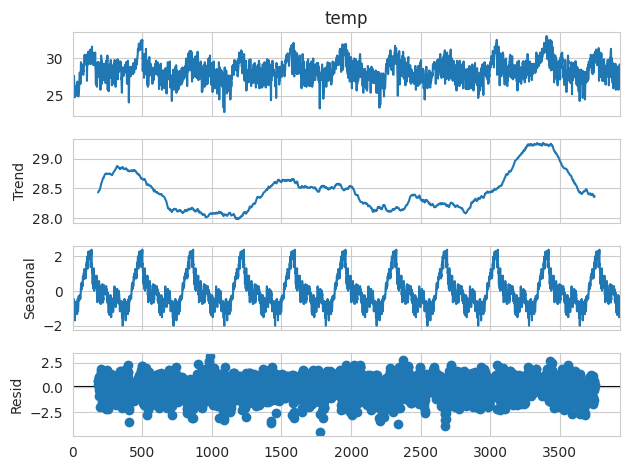

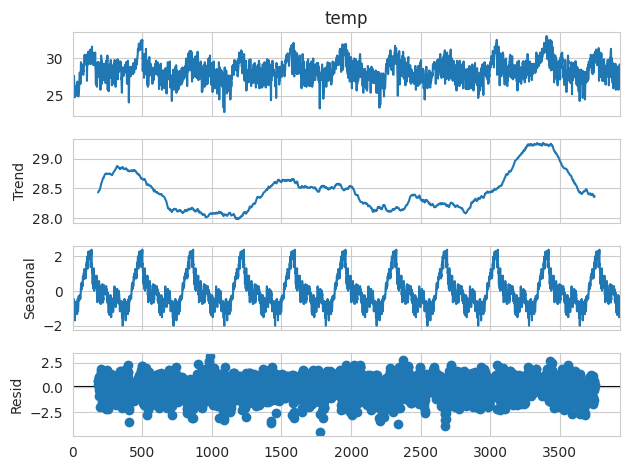

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df['temp'], model='additive', period=365).plot()


2 plots are the same


The time series decomposition of the *temp* variable reveals clear patterns across its trend, seasonal, and residual components, indicating that temperature behavior is influenced by both long-term climate dynamics and strong seasonal cycles.

### **1. Overall Time Series**

The temperature series exhibits regular fluctuations with noticeable peaks and troughs throughout the years. Daily variations appear consistent, while yearly cycles are clearly visible. The series does not show extreme volatility, suggesting stable climatological behavior.

### **2. Trend Component**

The long-term trend shows gradual changes over the 10-year period.

* From 2015 to around 2018, the trend decreases slightly, suggesting cooler average temperatures.
* Between 2018 and 2021, the trend remains relatively stable with minor fluctuations.
* From 2021 to mid-2023, the trend rises noticeably, indicating a warming period.
* After 2023, the trend slightly declines again.
  Overall, the trend indicates **slow-moving climatic shifts**, but no abrupt structural breaks.

### **3. Seasonal Component**

The seasonal pattern is strong and highly repetitive across all years. Each annual cycle includes:

* A rising phase toward the warmer months.
* A peak during mid-year.
* A decline toward the cooler months.
  This confirms that temperature follows a **clear, consistent yearly seasonal pattern**, making the feature highly predictable with seasonal models such as SARIMA or Prophet.

### **4. Residual Component**

The residuals are scattered around zero without obvious structure, indicating that most systematic patterns have been captured by the trend and seasonal components.

* There is no clear autocorrelation visible in the residual plot.
* Occasional spikes likely represent short-term weather anomalies such as storms, cold fronts, or heat waves.
  Overall, residuals appear random, suggesting a good decomposition with no major unexplained patterns.

### **Summary**

The decomposition clearly shows:

* A **strong and stable annual seasonality**
* A **slow-changing trend component** with mild warming and cooling phases
* **Random, structureless residuals**, indicating that the time series is well-behaved and suitable for forecasting models that leverage trend + seasonality
  This structure makes the temperature variable an excellent candidate for predictive modeling using time series or hybrid ML approaches.


